In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import seaborn as sns

I'm using a dataset that records the value and square feet of houses in a zipcode. I will be plotting a hexbin and contour plot, both of which are analogs to histograms and scatterplots in that they group results into bins, then change the colour depending on the number of records within each bin. This is effective at showing where the majority of records fall when we're working with larger datasets. 

In [2]:
df = pd.read_csv('kc_tax.csv')
#df = df.dropna()
#df.ZipCode = df.ZipCode.astype('int64')
df.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0


In [3]:
df1 = df[(df.TaxAssessedValue < 750000)&(df.SqFtTotLiving > 100)&(df.SqFtTotLiving < 3500)]
df1.shape

(432693, 3)

Here we have plotted a hexbin. This is more useful than a scatterplot for large numbers of data values - this dataframe has 432693 rows. If we were to use a scatterplot it would be too dense to make any useful insights into it. Using a hexbin can show us relationships easier between larger datasets, it groups the records into hexagonal bins and plots the hexagons with a colour indicating how many records are in that bin. Below, the positive correlation between tax value and square feet is clear, we can see that as the square feet increases, so does the tax value with the most common and darkest point being at around 1800 feet and $250,000.

Text(0, 0.5, 'Tax-Assessed Value')

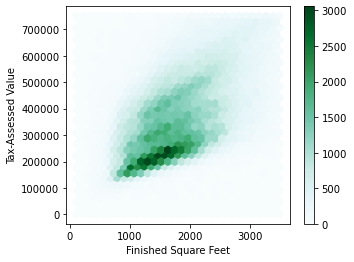

In [4]:
ax = df1.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue', gridsize=30, sharex=False, figsize=(5,4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')

In [5]:
plt.close()

In [6]:
zip_codes = [98188, 98105, 98108, 98126]
df_zipc = df.loc[df.ZipCode.isin(zip_codes), :]
df_zipc.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
10,202000.0,830,98108.0
11,210000.0,1130,98108.0
12,193000.0,1560,98108.0


In [7]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

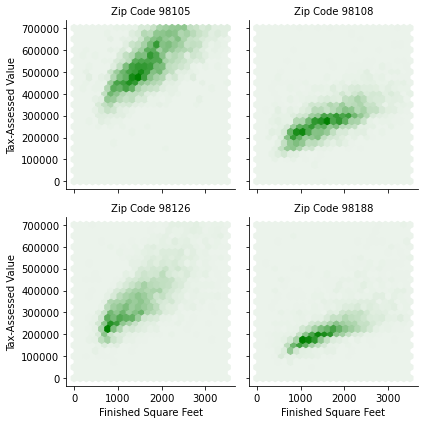

In [8]:
g = sns.FacetGrid(df_zipc, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', extent=[0,3500,0,700000], color='g')
g.set_axis_labels('Finished Square Feet', 'Tax-Assessed Value')
g.set_titles('Zip Code {col_name:.0f}')

This last plot is a contour plot using the seaborn kde plot function. I've only used a small range of data from the original dataset (from rows 0:1000) as creating the plot using the full dataset takes too long to load. Even with using only 1000 rows we can still see the general positive correlation and where the most dense part of the data is. 

In [9]:
df2 = df1.iloc[:1000]

In [10]:
#sns.kdeplot(data=df2, x='SqFtTotLiving', y='TaxAssessedValue', fill=True)
#plt.xlabel('Finished Square Feet')
#plt.ylabel('Tax Value')


In [11]:
df3 = pd.read_csv('lc_loans.csv')
df3.head(10)

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B
5,Fully Paid,A
6,Current,C
7,Fully Paid,E
8,Charged Off,F
9,Charged Off,B


In [12]:
df3_pivot = df3.pivot_table(index='grade', columns='status', aggfunc=len, margins=True)
df3_pivot.head(10)

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [13]:
df4 = df3_pivot.loc['A':'G',:].copy()
df4.head(10)

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241


In [14]:
df4.loc[:,'Charged Off': 'Late'] = df4.loc[:,'Charged Off':'Late'].div(df4['All'], axis=0)
df4.head(10)

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,72490
B,0.040054,0.709013,0.235401,0.015532,132370
C,0.049828,0.735702,0.191495,0.022974,120875
D,0.067410,0.717328,0.184189,0.031073,74277
E,0.081657,0.707936,0.170929,0.039478,34804
F,0.118258,0.654371,0.180409,0.046962,12904
G,0.126196,0.614008,0.198396,0.061401,3241


In [15]:
df4['All'] = df4['All']/sum(df4['All'])
df4.head(10)

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


An easier way of creating this form of contingency table is using pd.crosstab()

In [16]:
df_cross = pd.crosstab(index=df3['grade'], columns=df3['status'], margins=True)
df_cross

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


Crosstab has an argument called 'normalize' which will divide each value by the total sum of the row, column or overall total depending on which input you feed it, with 'index' it divides each value by the total sum of the row. This is a far easier method than the previous one used with .pivot_table(), where you had to manually select and divide the rows. 

In [17]:
df_cross_1 = pd.crosstab(index=df3['grade'], columns=df3['status'], margins=True, normalize='index')
df_cross_1

status,Charged Off,Current,Fully Paid,Late
grade,,,,
A,0.021548,0.690454,0.281528,0.006470
B,0.040054,0.709013,0.235401,0.015532
C,0.049828,0.735702,0.191495,0.022974
D,0.067410,0.717328,0.184189,0.031073
E,0.081657,0.707936,0.170929,0.039478
F,0.118258,0.654371,0.180409,0.046962
G,0.126196,0.614008,0.198396,0.061401
All,0.050273,0.712223,0.215797,0.021707


This last line of code is to add the 'All' column which takes the row total and divides it by the sum total of all rows. When a contingency table like this has been done correctly, the sum total value in the bottom right should equal the total number of values or in this case it should equal 1.0 as the values have been normalized. 

In [18]:
df_cross_1['All'] = df_cross['All']/sum([df_cross['All'][-1]])
df_cross_1

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187
All,0.050273,0.712223,0.215797,0.021707,1.000000


<AxesSubplot:xlabel='grade'>

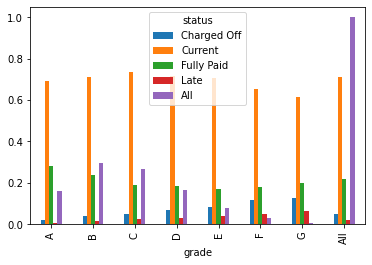

In [19]:
df_cross_1.plot(kind='bar')